In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
student_data = pd.read_csv('student_engagement_data_10000.csv',parse_dates = True)
student_data

,Student ID,Session ID,Date,EEG Data (PSD Features),Engagement Level,Attention Level,Internet Connectivity,Adaptivity Level,Learning Mode Prediction,Performance Metrics
0,1,183,2025-01-20,"[0.02336871035675725, 0.14892576656473, 0.4845...",High,High,High (Mobile/Wi-Fi),Moderate,Visual Learner,84
1,2,121,2025-01-20,"[0.3587673311624021, 0.8537981137219391, 0.420...",Low,High,Moderate (Wi-Fi),High,Auditory Learner,82
2,3,169,2025-01-10,"[0.7420744093003028, 0.9072353407615483, 0.122...",Moderate,High,Low (Mobile),Low,Auditory Learner,83
3,4,132,2025-01-20,"[0.5596059164442914, 0.4645215049524961, 0.062...",High,Moderate,Low (Mobile),Moderate,Visual Learner,66
4,5,190,2025-01-18,"[0.15041646487754368, 0.7331633184349893, 0.86...",High,High,High (Mobile/Wi-Fi),Moderate,Auditory Learner,93
...,...,...,...,...,...,...,...,...,...,...
9995,9996,136,2025-01-22,"[0.509843622253183, 0.06323592642360798, 0.009...",High,High,High (Mobile/Wi-Fi),Low,Auditory Learner,63
9996,9997,123,2025-01-28,"[0.7755554254921619, 0.7736343505972849, 0.406...",High,High,Moderate (Wi-Fi),High,Auditory Learner,79
9997,9998,162,2025-01-14,"[0.1584875069299465, 0.13541608777847447, 0.09...",Low,Low,Low (Mobile),High,Visual Learner,66
9998,9999,154,2025-01-15,"[0.930660706451791, 0.9327867175259232, 0.2261...",Moderate,Moderate,Low (Mobile),Moderate,Auditory Learner,86


Objective: Get an overview of the dataset.

Use .info() and .describe() to view data types and distributions.

In [14]:
student_info = student_data.info()
print(student_info)
student_description = student_data.describe()
print(student_description)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Student ID                10000 non-null  int64         
 1   Session ID                10000 non-null  int64         
 2   Date                      10000 non-null  datetime64[ns]
 3   EEG Data (PSD Features)   10000 non-null  object        
 4   Engagement Level          10000 non-null  object        
 5   Attention Level           10000 non-null  object        
 6   Internet Connectivity     10000 non-null  object        
 7   Adaptivity Level          10000 non-null  object        
 8   Learning Mode Prediction  10000 non-null  object        
 9   Performance Metrics       10000 non-null  int64         
 10  Engagement Level num      10000 non-null  int64         
 11  Attention Level num       10000 non-null  int64         
dtypes: datetime64[ns](1

Count null or missing values in each column.

In [16]:
is_null = student_data.isnull().sum()
print(f"There aren't any null value\n{is_null}")
is_nan = student_data.isna().sum()
print(f"There aren't any nan value\n{is_nan}")

There aren't any null value
Student ID                  0
Session ID                  0
Date                        0
EEG Data (PSD Features)     0
Engagement Level            0
Attention Level             0
Internet Connectivity       0
Adaptivity Level            0
Learning Mode Prediction    0
Performance Metrics         0
Engagement Level num        0
Attention Level num         0
dtype: int64
There aren't any nan value
Student ID                  0
Session ID                  0
Date                        0
EEG Data (PSD Features)     0
Engagement Level            0
Attention Level             0
Internet Connectivity       0
Adaptivity Level            0
Learning Mode Prediction    0
Performance Metrics         0
Engagement Level num        0
Attention Level num         0
dtype: int64


Value counts of categorical columns like learning_mode, student_id, etc.

In [6]:
columns = student_data.columns 
for index,value in enumerate(columns):
    if index in [0,2,3]:
        continue
    print((student_data[value].value_counts().sort_values(ascending = False)))
    

Session ID
164    133
162    127
140    125
138    120
110    119
      ... 
158     85
116     85
125     84
133     83
181     82
Name: count, Length: 100, dtype: int64
Engagement Level
Low         3366
Moderate    3357
High        3277
Name: count, dtype: int64
Attention Level
Moderate    3385
High        3317
Low         3298
Name: count, dtype: int64
Internet Connectivity
Moderate (Wi-Fi)       3389
High (Mobile/Wi-Fi)    3321
Low (Mobile)           3290
Name: count, dtype: int64
Adaptivity Level
Moderate    3360
Low         3331
High        3309
Name: count, dtype: int64
Learning Mode Prediction
Kinesthetic Learner    3374
Auditory Learner       3326
Visual Learner         3300
Name: count, dtype: int64
Performance Metrics
94    243
91    230
88    228
60    227
55    225
81    223
77    217
84    214
87    214
99    212
75    210
76    210
53    210
58    208
68    208
97    208
92    207
66    206
72    205
56    203
69    202
59    202
86    202
51    202
62    202
61    201
8

Group by date and calculate average attention and engagement
Plot line charts for daily trends.

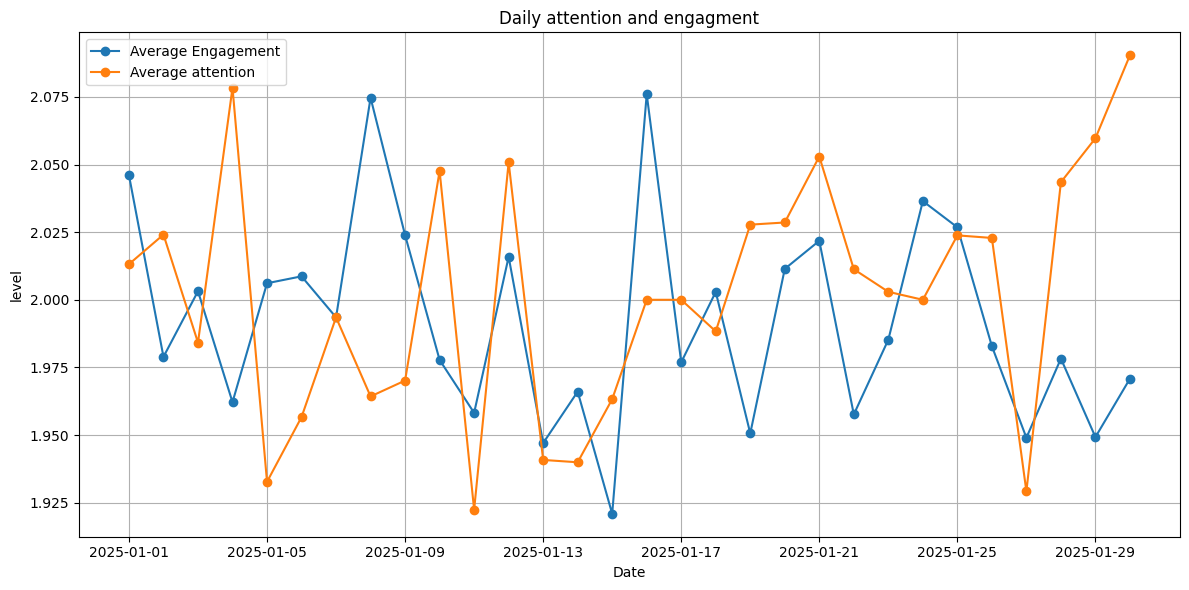

,Date,Engagement Level num,Attention Level num
0,2025-01-01,2.046053,2.013158
1,2025-01-02,1.978916,2.024096
2,2025-01-03,2.003165,1.984177
3,2025-01-04,1.962162,2.078378
4,2025-01-05,2.006116,1.932722
5,2025-01-06,2.008671,1.956647
6,2025-01-07,1.993506,1.993506
7,2025-01-08,2.074675,1.964286
8,2025-01-09,2.023881,1.970149
9,2025-01-10,1.977778,2.047619


In [7]:
level_mapping = {'Low':1,'Moderate':2,'High':3,}
student_data['Date'] = student_data['Date'].astype(str)
student_data['Engagement Level num'] = student_data['Engagement Level'].map(level_mapping)
student_data['Attention Level num'] = student_data['Attention Level'].map(level_mapping)
student_data['Date'] = pd.to_datetime(student_data['Date'])
ans = student_data.groupby('Date')[['Engagement Level num','Attention Level num']].mean().reset_index()
plt.figure(figsize = (12,6))
plt.plot(ans['Date'],ans['Engagement Level num'],label = 'Average Engagement',marker = 'o')
plt.plot(ans['Date'],ans['Attention Level num'],label = 'Average attention',marker = 'o')
plt.title('Daily attention and engagment')
plt.xlabel('Date')
plt.ylabel('level')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
ans

Group by student_id and average engagement or attention.

In [8]:
engagement_avg = student_data.groupby('Student ID')['Engagement Level num'].mean().reset_index()
top_10 = engagement_avg.sort_values(by = 'Engagement Level num' ,ascending = False).head(10)
bottom_10 = engagement_avg.sort_values(by = 'Engagement Level num' ,ascending = True).head(10)
print(top_10)
print(bottom_10)

      Student ID  Engagement Level num
9983        9984                   3.0
9981        9982                   3.0
9979        9980                   3.0
9978        9979                   3.0
9975        9976                   3.0
9974        9975                   3.0
9971        9972                   3.0
9969        9970                   3.0
31            32                   3.0
30            31                   3.0
      Student ID  Engagement Level num
46            47                   1.0
47            48                   1.0
5              6                   1.0
8              9                   1.0
9984        9985                   1.0
9985        9986                   1.0
9987        9988                   1.0
9989        9990                   1.0
9990        9991                   1.0
3365        3366                   1.0


Sort and display top/bottom 10 students using a bar chart.

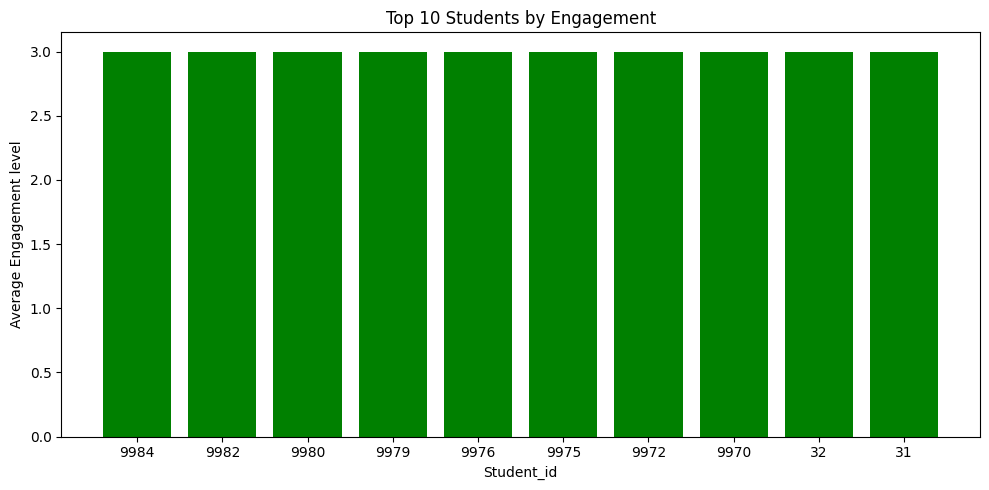

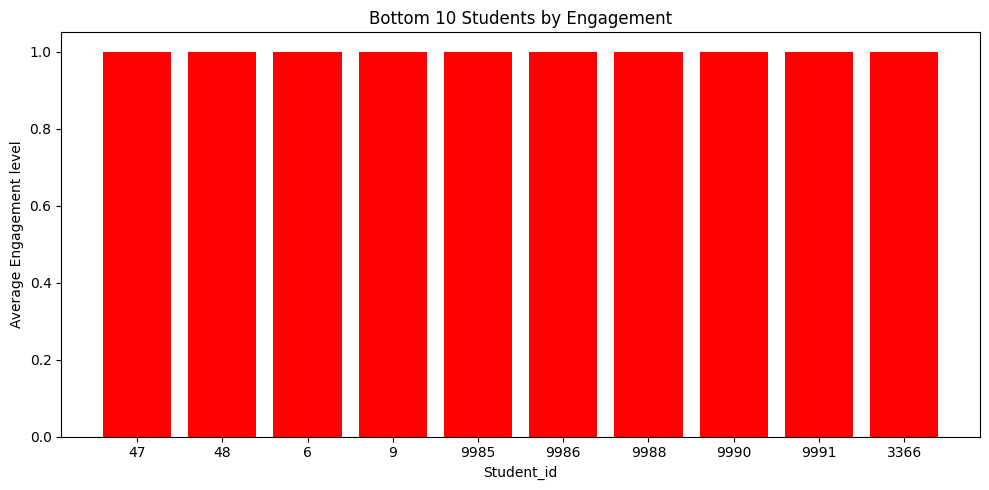

In [9]:
plt.figure(figsize=(10,5))
plt.bar(top_10['Student ID'].astype(str),top_10['Engagement Level num'],color = 'green')
plt.xlabel('Student_id')
plt.ylabel('Average Engagement level')
plt.title('Top 10 Students by Engagement')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,5))
plt.bar(bottom_10['Student ID'].astype(str),bottom_10['Engagement Level num'],color = 'red')
plt.xlabel('Student_id')
plt.ylabel('Average Engagement level')
plt.title('Bottom 10 Students by Engagement')
plt.tight_layout()
plt.show()

# Group by learning_mode and compute average engagement.

In [12]:
avg_by_mode = student_data.groupby('Learning Mode Prediction')['Engagement Level num'].mean().reset_index()
avg_by_mode

,Learning Mode Prediction,Engagement Level num
0,Auditory Learner,2.015334
1,Kinesthetic Learner,1.977771
2,Visual Learner,1.980303


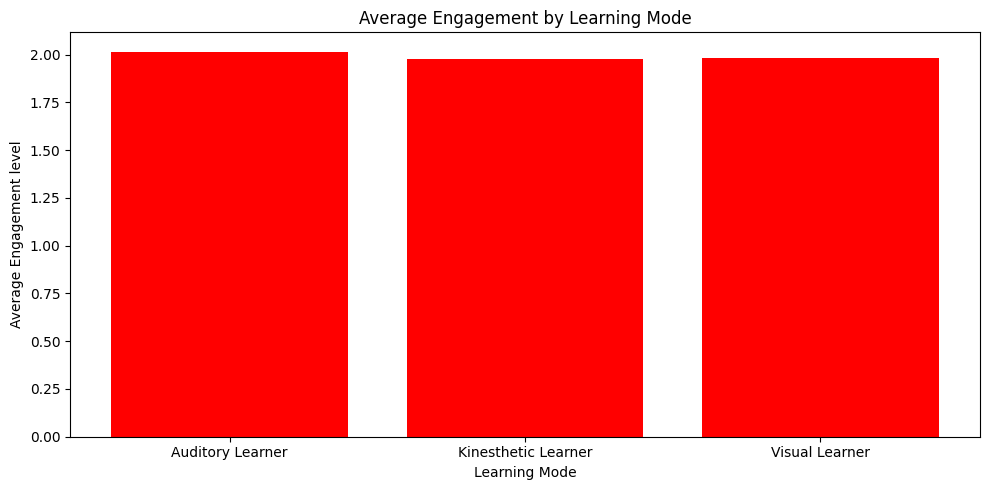

In [13]:
plt.figure(figsize=(10,5))
plt.bar(avg_by_mode['Learning Mode Prediction'].astype(str),avg_by_mode['Engagement Level num'],color = 'red')
plt.title('Average Engagement by Learning Mode')
plt.xlabel('Learning Mode')
plt.ylabel('Average Engagement level')
plt.tight_layout()
plt.show()